In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("bigdatamart_train.csv")
test=pd.read_csv("bigdatamart_test.csv")
print(test.shape)
print(train.shape)
train.head()

(5681, 11)
(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.info()
print("_"*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight       

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


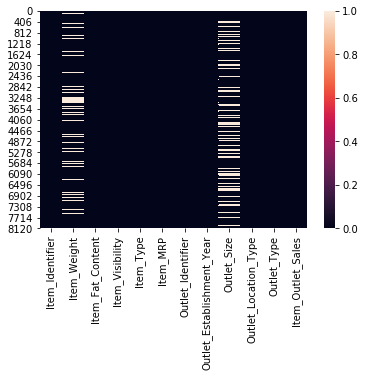

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


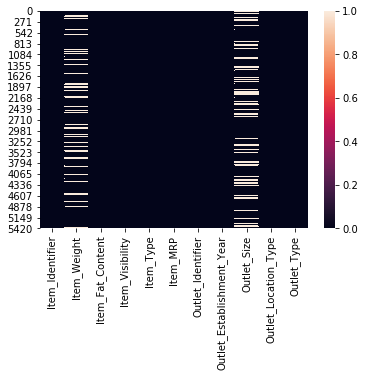

In [5]:
data=[train,test]
for i in data:
    print(i.isnull().sum())
    sns.heatmap(i.isnull())
    plt.show()

there are presence of null values in Item_Weight and Outlet_Size

to remove ouliers

In [6]:
for d in data:
    d["Item_Weight"]=d["Item_Weight"].fillna(d["Item_Weight"].median())
    print(d["Outlet_Size"].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [7]:
for d in data:
    d["Outlet_Size"]=d["Outlet_Size"].fillna("Medium")

In [8]:
for i in data:
    print(i.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [9]:
ctr=train.columns
cte=test.columns
for i in [ctr,cte]:
    print(train[i].nunique())
    print("--"*20)

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64
----------------------------------------
Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64
----------------------------------------


here there is no outliers

Encode to object data

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for d in data:
    for i in ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]:
        d[i]=le.fit_transform(d[i])

In [11]:
for d in data:
    print(d.dtypes)

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object
Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object


hence every data is became a int type

to check correlation with item output sales

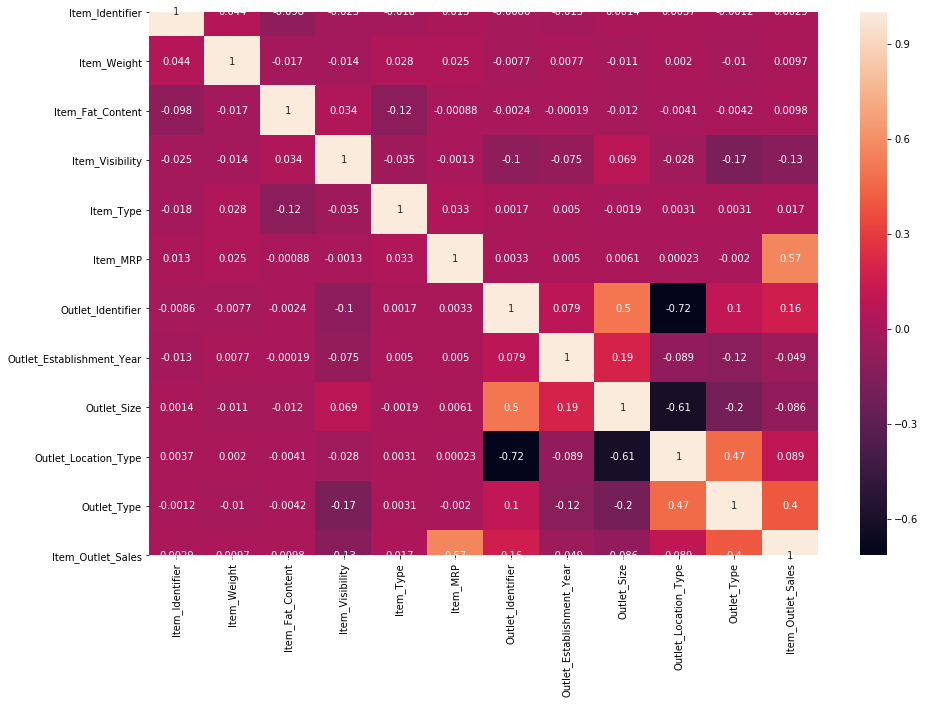

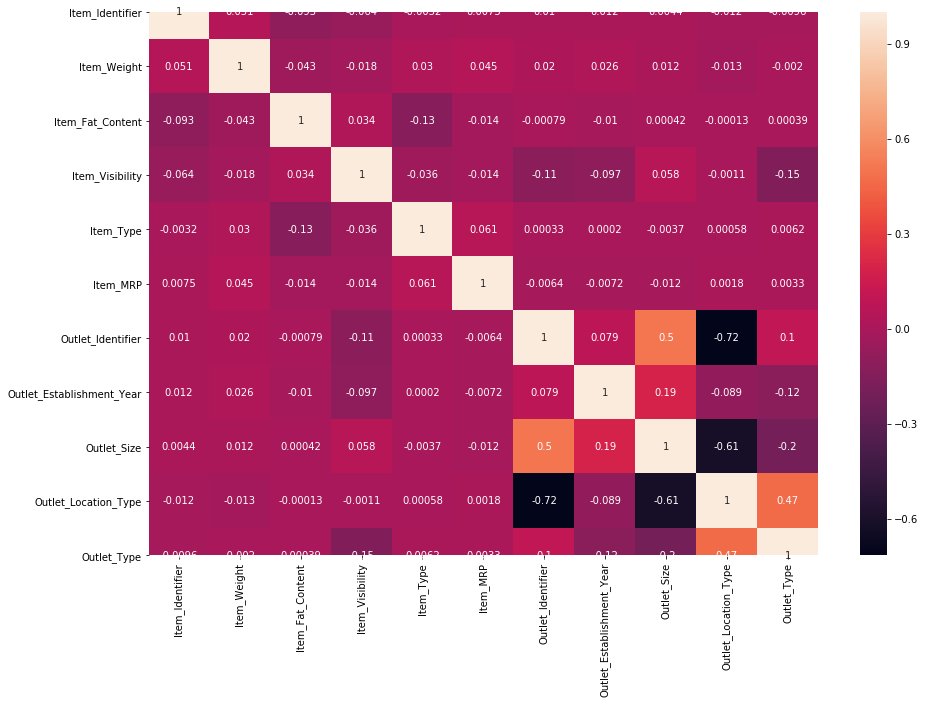

In [12]:
for d in data:
    plt.figure(figsize=(15,10))
    sns.heatmap(d.corr(),annot=True)
    plt.show()

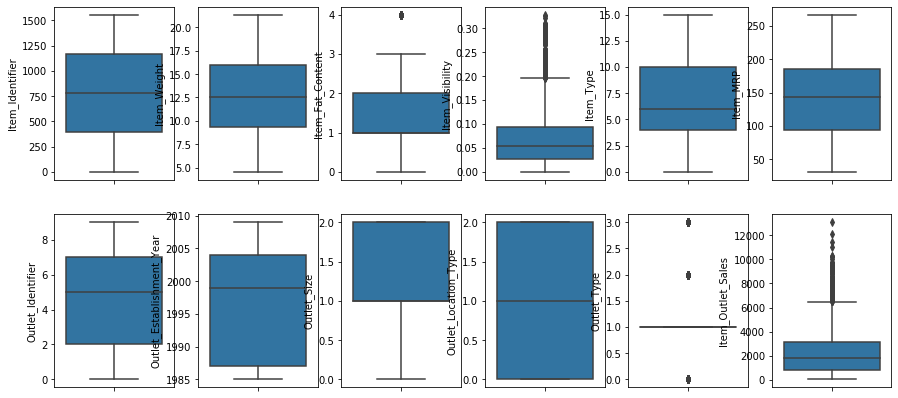

In [13]:
plt.figure(figsize=(15,7))
for i in range(len(ctr)):
    plt.subplot(2,6,i+1)
    sns.boxplot(train[ctr[i]],orient="v")

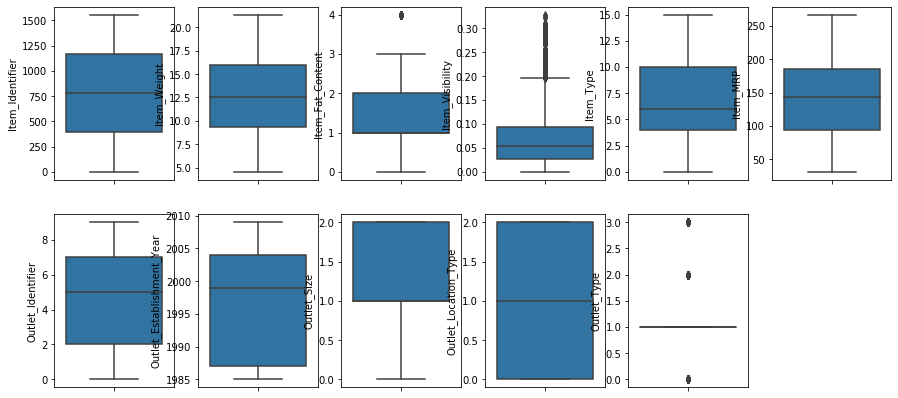

In [14]:
plt.figure(figsize=(15,7))
for i in range(len(cte)):
    plt.subplot(2,6,i+1)
    sns.boxplot(train[cte[i]],orient="v")

here the presented outliers are not considerable outliers

to find skewness

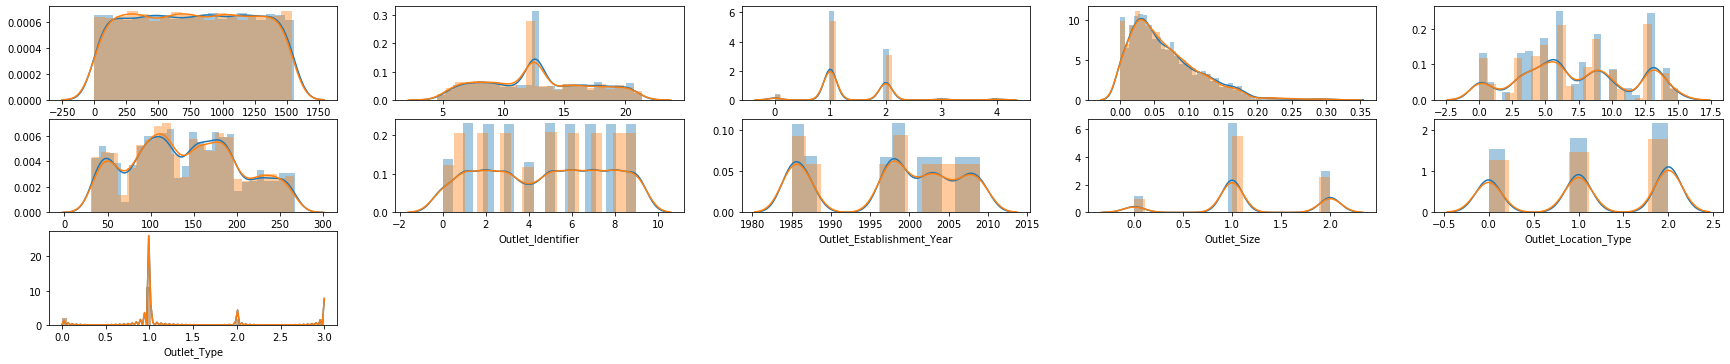

In [15]:
c=[cte]
plt.figure(figsize=(30,10))
for d in data:
    for o in c:
        for i in range(len(o)):
            plt.subplot(5,5,i+1)
            sns.distplot(d[o[i]])

In [16]:
print(train.skew())
print("--"*20)
print(test.skew())

Item_Identifier             -0.008877
Item_Weight                  0.121845
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64
----------------------------------------
Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64


In [17]:
col=["Item_Visibility","Outlet_Type"]
for d in data:
    for i in col:
        d[i]=np.sqrt(d[i])
    print(d.skew())

Item_Identifier             -0.008877
Item_Weight                  0.121845
Item_Fat_Content             0.994824
Item_Visibility             -0.098056
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.813899
Item_Outlet_Sales            1.177531
dtype: float64
Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility             -0.094941
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                 -0.813479
dtype: float64


In [18]:
x=train.iloc[:,0:-1]
y=train.iloc[:,-1]
print(x.shape)
print(y.shape)

(8523, 11)
(8523,)


to find best random_state

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
macc=0
rand=0
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    acc=r2_score(ytest,pred)
    if acc>macc:
        macc=acc
        rand=i
print("random state : ",rand,"acc : ",macc)
print("mse",mean_squared_error(ytest,pred))
print("moe",mean_absolute_error(ytest,pred))

random state :  3 acc :  0.5709739060601484
mse 1328102.9869272949
moe 850.0877287325085


In [20]:
from sklearn.svm import SVR
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=119)
svr=SVR()
svr.fit(xtrain,ytrain)
pred=svr.predict(xtest)
print("mse",mean_squared_error(ytest,pred))
print("moe",mean_absolute_error(ytest,pred))
print("r2score",r2_score(ytest,pred))

mse 3069105.5709034787
moe 1294.9914163216483
r2score -0.057108917959354244


to find best model by cross val score

In [21]:
from sklearn.model_selection import cross_val_score
l=[lr,svr]
for i in l:
    cvs=cross_val_score(i,x,y,cv=4)
    print("cross val score of ",i,cvs.mean())

cross val score of  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.5336350554688085
cross val score of  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) -0.05242901143729506


linear regression is seam to be a good model

to find item outlet sales for test data

In [22]:
ytest=lr.predict(test)
ytest

array([1872.85223895, 1315.72948201, 1777.37576006, ..., 1769.73644089,
       3280.61629908, 1181.32337102])

hence item_outlet sales of test data is defined by train data  

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.126678,4,249.8092,9,1999,1,0,1.000000,3735.1380
1,8,5.92,2,0.138846,14,48.2692,3,2009,1,2,1.414214,443.4228
2,662,17.50,1,0.129461,10,141.6180,9,1999,1,0,1.000000,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0.000000,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1.000000,994.7052


In [24]:
import joblib
joblib.dump(lr,"bdm Saleas.obj")

['bdm Saleas.obj']

In [25]:
v=joblib.load("bdm Saleas.obj")

In [26]:
l=np.array([156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1])
l=l.reshape(1,-1)

In [27]:
v.predict(l)

array([4111.31875712])